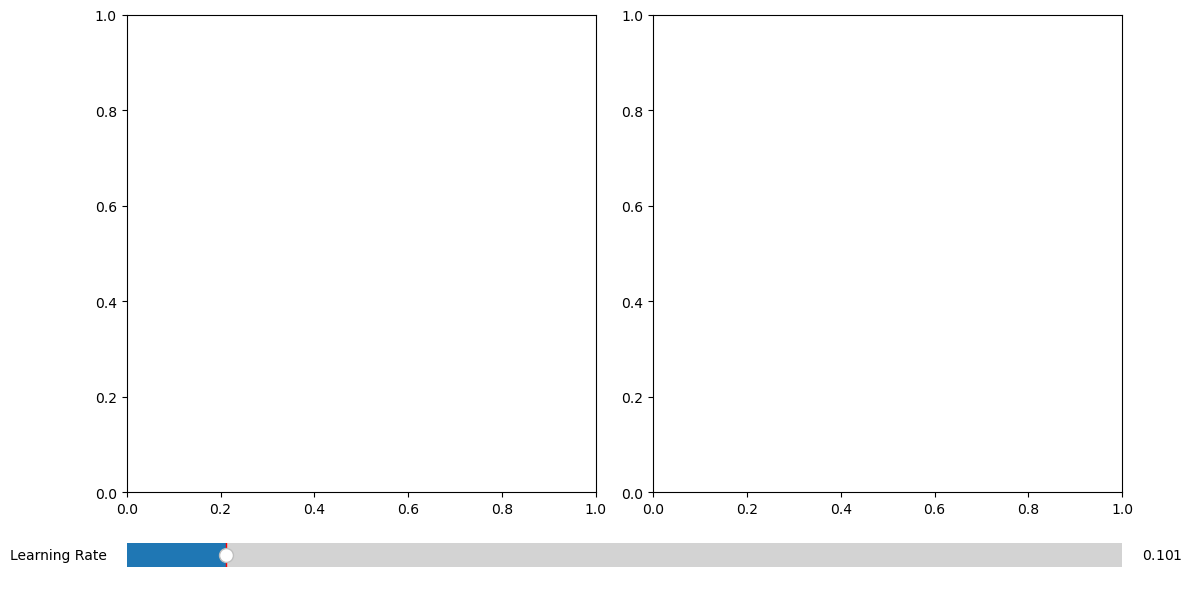

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
from sklearn.metrics import log_loss

# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

# Initialize weights
np.random.seed(0)
W1 = np.random.randn(2, 4)
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1)
b2 = np.zeros((1, 1))

losses = []

# Training step
def train_step():
    global W1, W2, b1, b2
    lr = lr_slider.val

    # Forward
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    # Loss
    loss = log_loss(y, a2)
    losses.append(loss)

    # Backward
    dz2 = a2 - y
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = dz2 @ W2.T * sigmoid_deriv(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

# Plot setup
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, height_ratios=[10, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
slider_ax = fig.add_subplot(gs[1, :])

# Learning rate slider
lr_slider = Slider(slider_ax, "Learning Rate", 0.001, 1.0, valinit=0.1, valstep=0.01)

# Animation function
def animate(i):
    train_step()
    ax1.cla()
    ax2.cla()

    # Decision boundary
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    z1 = sigmoid(grid @ W1 + b1)
    z2 = sigmoid(z1 @ W2 + b2)
    zz = z2.reshape(xx.shape)

    ax1.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['#FFAAAA', '#AAAAFF'], alpha=0.6)
    ax1.scatter(X[:, 0], X[:, 1], c=y[:, 0], s=100, edgecolors='k')

    # Hidden layer activation overlays
    activations = sigmoid(X @ W1 + b1)
    for j in range(4):
        ax1.scatter(X[:, 0], X[:, 1], 
                    c=activations[:, j], cmap='coolwarm', 
                    s=150, alpha=0.3, label=f'Neuron {j+1}')

    ax1.set_title("Decision Boundary with Hidden Layer Activations")
    ax1.legend()

    # Loss plot
    ax2.plot(losses, color='purple')
    ax2.set_title("Loss Over Time")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Log Loss")
    ax2.grid(True)

# Assign animation variable right before plt.show()
ani = FuncAnimation(fig, animate, frames=200, interval=100)
plt.tight_layout()
plt.show()
